In [222]:
# importing the modules
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import seaborn as sns

In [223]:
# reading the dataset
df = pd.read_csv("heart.csv")
%matplotlib inline

In [224]:

df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
79,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2,0
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0


In [225]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

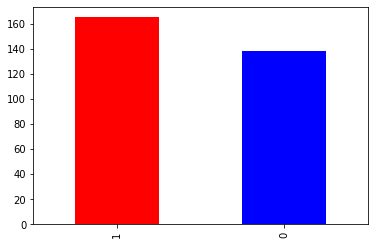

In [226]:
df.target.value_counts().plot(kind="bar",color=["red","blue"])

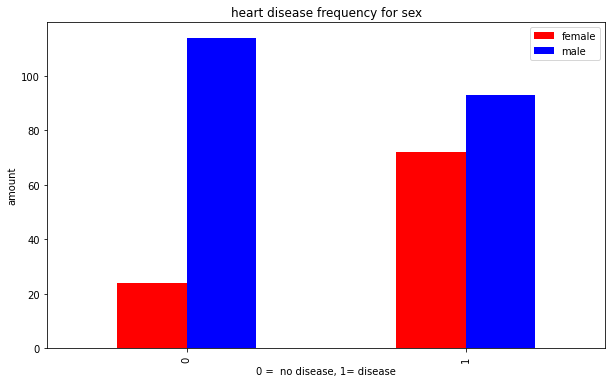

In [227]:
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["red","blue"])
plt.title("heart disease frequency for sex")
plt.xlabel("0 =  no disease, 1= disease")
plt.ylabel("amount")
plt.legend(["female","male"])


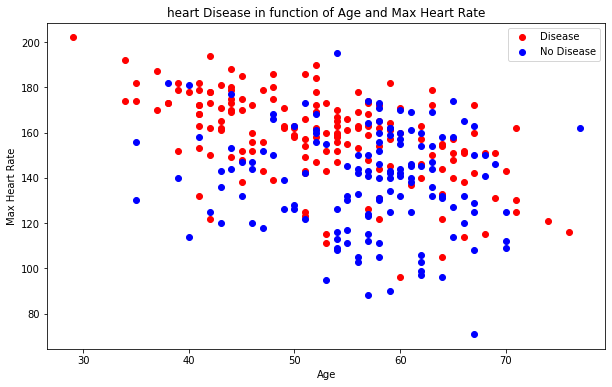

In [228]:
# Craete another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c ="red")
#Scatter with negative examples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c = "blue")

plt.title("heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);


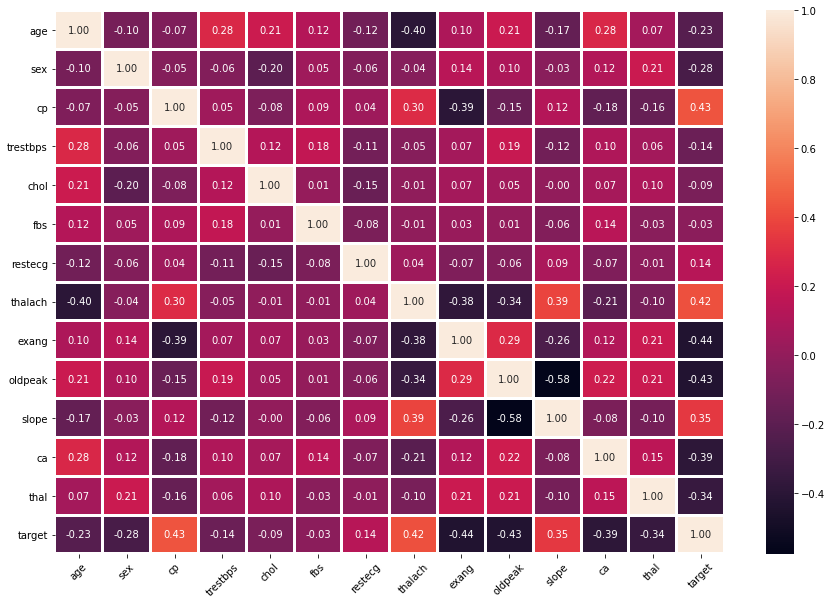

In [229]:
# correlation heatmap between the features
heat_map = plt.subplots(figsize=(15,10))
heat_map = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2f', linewidths=2)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=45);


In [217]:
x = df.drop("target",axis=1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [239]:
model = keras.Sequential([
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(13, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_history=model.fit(x_train, y_train, epochs=300)

Epoch 1/300
8/8 [==============================] - 0s 1ms/step - loss: 69.8081 - accuracy: 0.4545
Epoch 2/300
8/8 [==============================] - 0s 1ms/step - loss: 57.2477 - accuracy: 0.4669
Epoch 3/300
8/8 [==============================] - 0s 2ms/step - loss: 44.8584 - accuracy: 0.4669
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 34.8416 - accuracy: 0.4545
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 23.1753 - accuracy: 0.5331
Epoch 6/300
8/8 [==============================] - 0s 2ms/step - loss: 20.7945 - accuracy: 0.4421
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 13.8219 - accuracy: 0.4917
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 12.4112 - accuracy: 0.4876
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 10.4716 - accuracy: 0.5372
Epoch 10/300
8/8 [==============================] - 0s 2ms/step - loss: 12.4691 - accuracy: 0.5248
Epoch 11/300
8/8 [=

8/8 [==============================] - 0s 2ms/step - loss: 0.8358 - accuracy: 0.6281
Epoch 85/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7391 - accuracy: 0.6488
Epoch 86/300
8/8 [==============================] - 0s 2ms/step - loss: 0.9211 - accuracy: 0.6529
Epoch 87/300
8/8 [==============================] - 0s 2ms/step - loss: 0.8818 - accuracy: 0.5992
Epoch 88/300
8/8 [==============================] - 0s 2ms/step - loss: 0.8720 - accuracy: 0.6694
Epoch 89/300
8/8 [==============================] - 0s 4ms/step - loss: 0.8818 - accuracy: 0.6281
Epoch 90/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7695 - accuracy: 0.6405
Epoch 91/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7612 - accuracy: 0.6446
Epoch 92/300
8/8 [==============================] - 0s 2ms/step - loss: 0.9830 - accuracy: 0.5826
Epoch 93/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7796 - accuracy: 0.6405
Epoch 94/300
8/8 [===============

8/8 [==============================] - 0s 2ms/step - loss: 0.6641 - accuracy: 0.6653
Epoch 167/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.6653
Epoch 168/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.6818
Epoch 169/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7302 - accuracy: 0.6198
Epoch 170/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6818 - accuracy: 0.6818
Epoch 171/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.6653
Epoch 172/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6382 - accuracy: 0.6446
Epoch 173/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6736
Epoch 174/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7317 - accuracy: 0.6529
Epoch 175/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7107
Epoch 176/300
8/8 [=====

8/8 [==============================] - 0s 2ms/step - loss: 0.5817 - accuracy: 0.7273
Epoch 249/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6144 - accuracy: 0.6612
Epoch 250/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6008 - accuracy: 0.7107
Epoch 251/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5832 - accuracy: 0.7231
Epoch 252/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5530 - accuracy: 0.7066
Epoch 253/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.6736
Epoch 254/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.6942
Epoch 255/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6241 - accuracy: 0.6736
Epoch 256/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.6736
Epoch 257/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6058 - accuracy: 0.6860
Epoch 258/300
8/8 [=====

In [236]:
yp = model.predict(x_test)
# print(y_train[:10])
# print(yp[:10])
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [237]:

from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        28
           1       0.71      0.76      0.74        33

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



tf.Tensor(
[[18 10]
 [ 8 25]], shape=(2, 2), dtype=int32)


Text(69.0, 0.5, 'Truth')

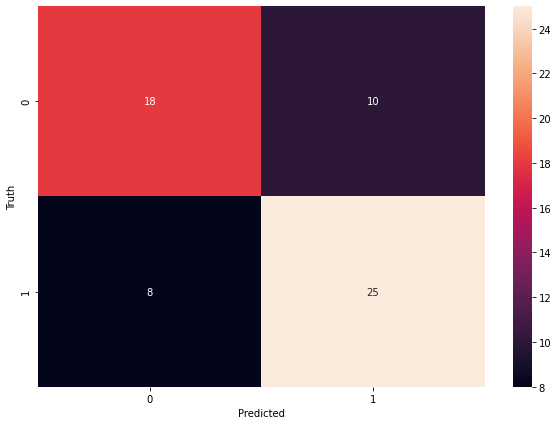

In [238]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

print(cm)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
